**Hey Friends, Thanks for Coming on my page.
Today we are going to analysis RainFall in Australia.
Hope you enjoy and feel free to comment my mistake.**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# Import Helpful And Important Libraries

In [2]:
# Numpy and Pandas for statistics and DataSet
import numpy as np
import pandas as pd

# Seaborn and matplotlib for Graphs and Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import matplotlib

# Encoder for categorical Columns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Libraries for Machine Learning Algorithms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Warning Library to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [3]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **Explore Data**

In [4]:
df.shape

(145460, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Columns Unique Values**

In [8]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print("{} have {} unique values: ".format(col, df[col].nunique()))
print("*" * 35)
for col in df.columns:
    if df[col].nunique() <= 16:
        print("{}: {}".format(col, df[col].unique()))

Date have 3436 unique values: 
Location have 49 unique values: 
WindGustDir have 16 unique values: 
WindDir9am have 16 unique values: 
WindDir3pm have 16 unique values: 
RainToday have 2 unique values: 
RainTomorrow have 2 unique values: 
***********************************
WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Cloud9am: [ 8. nan  7.  1.  0.  5.  4.  2.  6.  3.  9.]
Cloud3pm: [nan  2.  8.  7.  1.  5.  4.  6.  3.  0.  9.]
RainToday: ['No' 'Yes' nan]
RainTomorrow: ['No' 'Yes' nan]


* **Data set have 1,45,460 Rows and 23 Columns**
* **In Columns 16 have Numerical Values and 7 have Categorical Values**
* **Only Date and Location haven't Missing Values**


# Fill Missing Values in Numerical columns
**Select Mean method to fill numerical missing values, First find mean value of each columns and fill that value in empty Columns**

In [9]:
# Fill Missing value in Numerical columns with mean functions
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
print("Process Completed")

Process Completed


In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

# Now we fill Categorical columns
**Will Use Mode Method**

In [11]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
print("Process Completed")

Process Completed


In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Exploratory Data Analysis

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
px.histogram(df, x='Location', 
             title='Location vs. Rainy Days', 
             color='RainToday')

**Here we see more rain in "Portland" with a count of 1094 times and less rain in "Canberra" with a count of 2807**

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

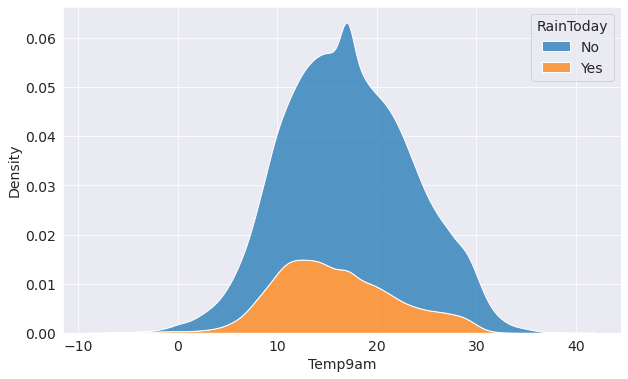

In [15]:
sns.kdeplot(data=df, x="Temp9am", hue="RainToday", multiple="stack")

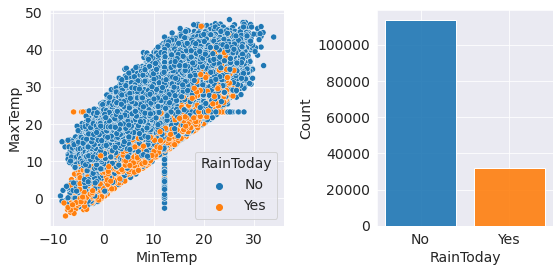

In [16]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="MinTemp", y="MaxTemp", hue="RainToday", ax=axs[0])
sns.histplot(data=df, x="RainToday", hue="RainToday", shrink=.8, alpha=.9, legend=False, ax=axs[1])
f.tight_layout()

* **In Scatter Plot, for rain the Mintemp is between -0 to 25 and for MaxTemp is between -10 to 30**
* **In Count Plot, No have more counts then Yess**

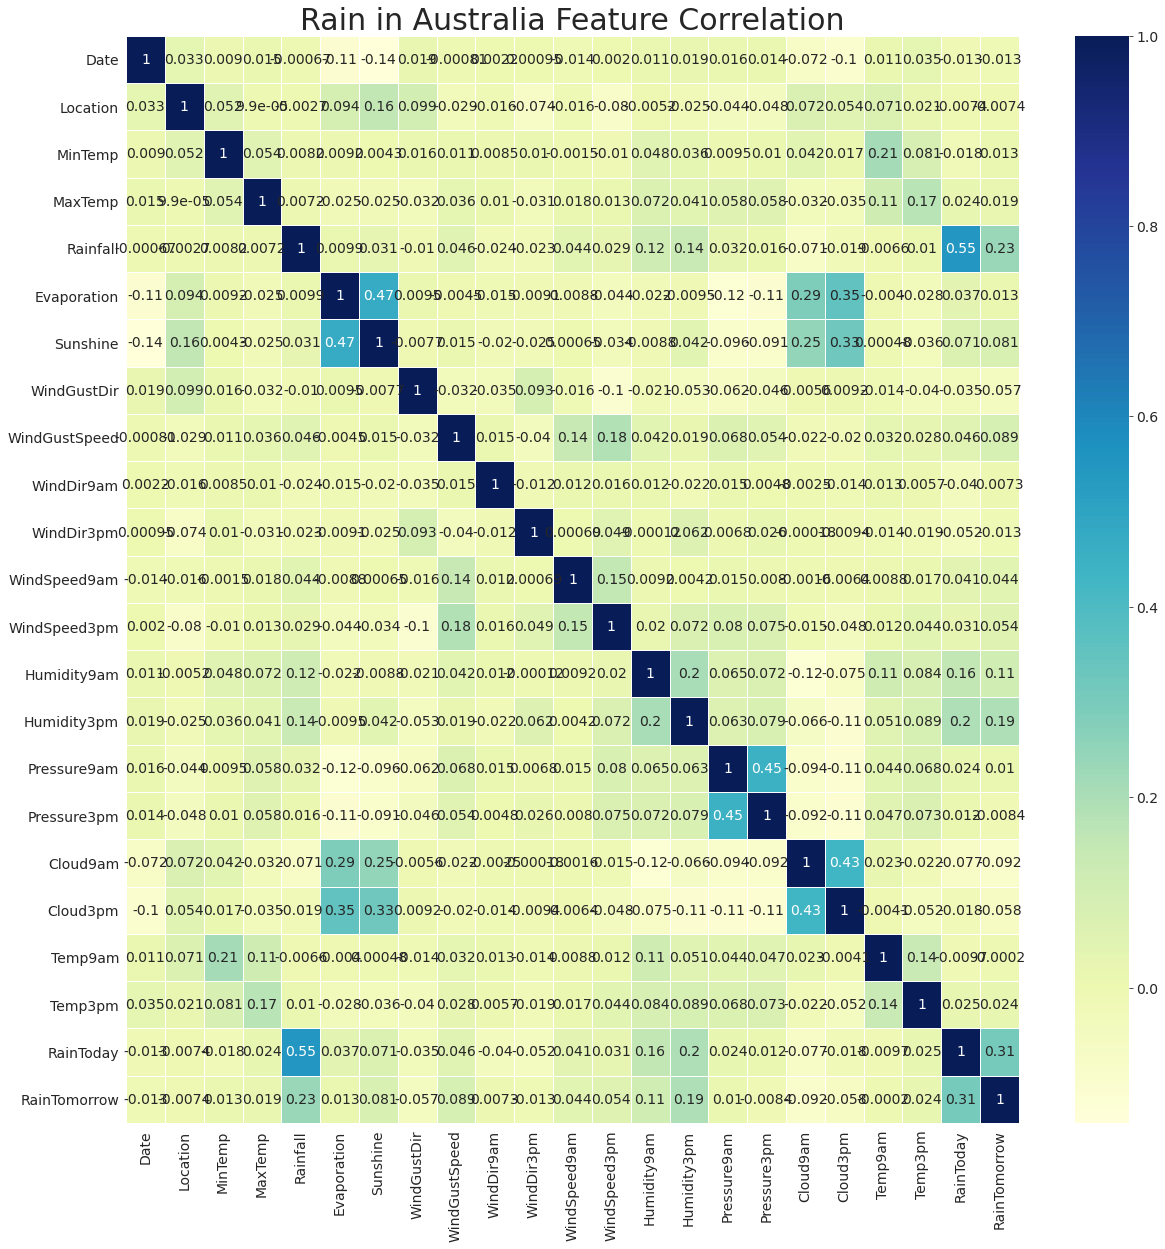

In [17]:
data = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
plt.figure(figsize=(15,11))
sns.heatmap(data, linecolor='white',linewidths=1, cmap="YlGnBu", annot=True)
plt.title('Rain in Australia Feature Correlation', size=30)
figure = plt.gcf()
figure.set_size_inches(20, 20)
plt.show()

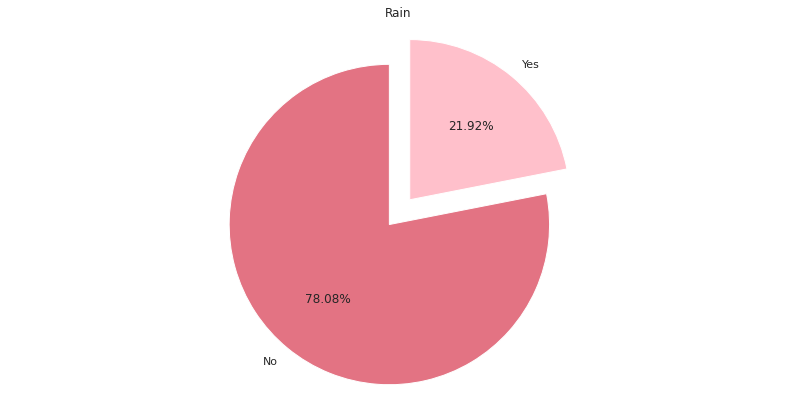

In [18]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))
labels=['No', 'Yes']
plt.pie(df['RainToday'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Rain')
plt.axis('equal')
plt.show()

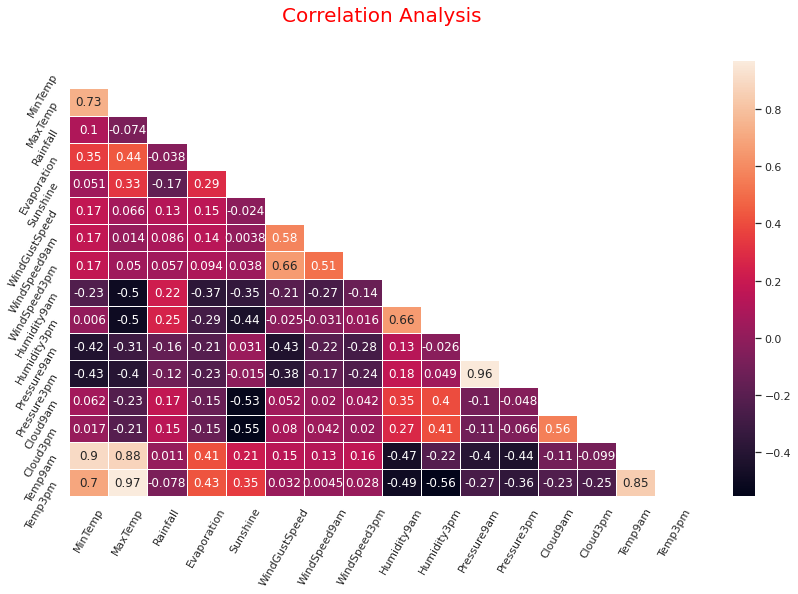

In [19]:
plt.figure(figsize=(14,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

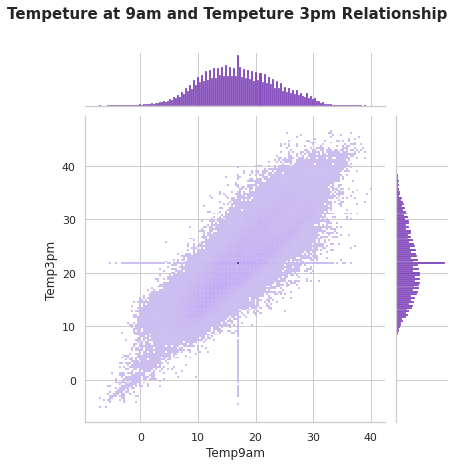

In [20]:
sns.set_palette("plasma")
sns.jointplot(data=df, x="Temp9am", y="Temp3pm", kind="hist")
plt.title('Tempeture at 9am and Tempeture 3pm Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

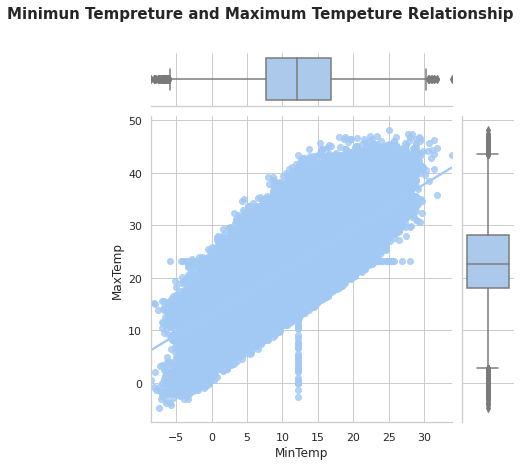

In [21]:
sns.set_context("notebook")
sns.set_palette("pastel")
g = sns.JointGrid(data=df, x="MinTemp", y="MaxTemp")
g.plot(sns.regplot, sns.boxplot)
plt.title('Minimun Tempreture and Maximum Tempeture Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

# Train Model

In [22]:
X = df.drop(['RainTomorrow', 'Date'], axis=1) # Features
y = df['RainTomorrow'] # Label

X.shape, y.shape

((145460, 21), (145460,))

# Categorical to Numerical
**Change Categorical columns into Numerical values with the help of Label Encoder**

In [23]:
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object':
        lb = LabelEncoder()
        X_enc[col] = lb.fit_transform(X[col].values)
        y_enc = lb.fit_transform(df['RainTomorrow'])
        

X_enc.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.3, random_state=1)

**Decision Tree Classifier**

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

def dt_classifer(X, y):
    list = []
    # Split data in train_test_split
    print("First we split data with train_test_split and kfolds: ")
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
    # Find best parameters for decision tree
    print("Lets findout best parameters for decision tree: ")
    dt_classifier = DecisionTreeClassifier()
    param_dist = {"max_depth": [3, 10],
              "random_state": [3, 11],
              "max_features": range(1, 11),
            "splitter": ["best", "random"], 
              "min_samples_split": range(2, 11),
              "criterion": ["gini", "entropy"]}
    random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train, y_train)
    print("best parameters: ", random_search.best_params_)
    print("best parameters score: ", random_search.best_score_ * 100)
    # Save the dict in list
    for v in random_search.best_params_.values():
        list.append(v)
    
    # Give parameters to Decision tree with train_test_split
    print("Now we use this parameters in our model: ")
    dt_classifier = DecisionTreeClassifier(splitter= list[0], random_state=list[1], min_samples_split=list[2], max_features=list[3], max_depth=list[4], criterion=list[5])
    dt_classifier.fit(X_train, y_train)
    y_pred_dt = dt_classifier.predict(X_test)
    dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
    dt_train_acc = cross_val_score(dt_classifier, X_train, y_train)
    print("Model Accuracy with train_test_split: ", dt_test_accuracy * 100)
    
    # Give same parameters to kfold splitting
    kfolds = KFold(n_splits=10, random_state=7, shuffle=True)
    model = DecisionTreeClassifier(splitter= list[0], random_state=list[1], min_samples_split=list[2], max_features=list[3], max_depth=list[4], criterion=list[5])
    score = cross_val_score(model, X, y, cv=kfolds)
    print("Accuracy of model with Kfolds: ",(score.mean()*100))
    

dt_classifer(X_enc, y_enc)

First we split data with train_test_split and kfolds: 
Lets findout best parameters for decision tree: 
best parameters:  {'splitter': 'best', 'random_state': 3, 'min_samples_split': 9, 'max_features': 5, 'max_depth': 10, 'criterion': 'entropy'}
best parameters score:  83.45445458334714
Now we use this parameters in our model: 
Model Accuracy with train_test_split:  84.11247078234567
Accuracy of model with Kfolds:  83.81273202254916


**XGBoost Classifier**

In [26]:
xgb_classifier = XGBClassifier(random_state=42, verbosity = 0)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_train_acc = cross_val_score(xgb_classifier, X_train, y_train)

**Random Forest**

In [27]:
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(X_train, y_train)
random_pred = random_forest.predict(X_test)
random_test_score = accuracy_score(y_test, random_pred)
acc_random = cross_val_score(random_forest, X_train, y_train, cv=5)

**Lets Find best Feature for random forest**

In [28]:
random_forest.feature_importances_
feature_importance = pd.DataFrame({'importance': random_forest.feature_importances_}, index= X_enc.columns).sort_values('importance')
feature_importance

,importance
Location,0.000780
WindDir9am,0.000855
WindDir3pm,0.000872
WindGustDir,0.000874
WindSpeed9am,0.001075
Evaporation,0.001452
WindSpeed3pm,0.001910
Temp9am,0.003427
MinTemp,0.004215
MaxTemp,0.006807


<AxesSubplot:>

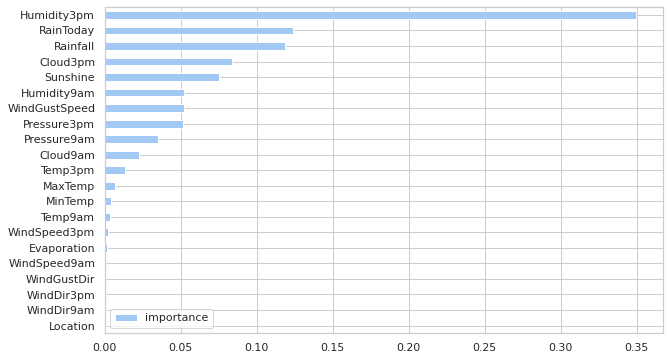

In [29]:
feature_importance.plot.barh()

In [30]:
feature_importance[feature_importance.importance > 0.04]

,importance
Pressure3pm,0.051505
WindGustSpeed,0.052085
Humidity9am,0.052097
Sunshine,0.075027
Cloud3pm,0.083499
Rainfall,0.118434
RainToday,0.124120
Humidity3pm,0.349704


In [31]:
rf_columns = df.loc[:, ('WindGustSpeed', 'Pressure3pm', 'Humidity9am', 'Cloud3pm', 'Sunshine', 'Rainfall', 'RainToday', 'Humidity3pm', 'Pressure9am')]
lb = LabelEncoder()
x_enc = lb.fit_transform(rf_columns['RainToday'].values)
x_enc
rf_columns['RainToday1'] = x_enc
X = rf_columns.drop('RainToday', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=1)
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(X_train, y_train)
random_pred = random_forest.predict(X_test)
random_test_scores = accuracy_score(y_test, random_pred)
acc_randomm = cross_val_score(random_forest, X_train, y_train, cv=5)

In [32]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Train Score': [acc_randomm.mean(), xgb_train_acc.mean()],
    'Test Score': [random_test_scores, xgb_accuracy]          
              })
result_df = results.sort_values(by='Train Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train Score,Test Score
Model,,
XGBoost,0.855571,0.859916
Random Forest,0.838100,0.844104


**Thank you so much to visit, If you like my work please upvote and Comment too,**
***I WILL UPDATE THIS NOTEBOOK REGULARY***